<a href="https://colab.research.google.com/github/TushitPalamkar/PyTorch/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
print(torch.__version__)

2.4.0+cu121


In [ ]:
scalar=torch.tensor(5)
scalar
#get tensor back
scalar.item()

5

In [ ]:
#Vector
vector=torch.tensor([1,3])
vector.shape
#Matrix
MATRIX=torch.tensor([[1,3],[4,5]])
MATRIX[0][1]
TENSOR=torch.tensor([[[1,2,3],[4,5,6],[2,4,5]]])
TENSOR.shape

torch.Size([1, 3, 3])

In [ ]:
## Random Tensors are important because the way neural networks learn is that they start with tensors full of random numers and then adjust those random numers to represent the data
Random=torch.rand(2,3,4)
Random.ndim
#Create a random tensor with similar shape to an image sensor
random_image=torch.rand(size=(200,220,3))# height width color channels
random_image.shape
zero=torch.zeros(3,3)
zero
ones=torch.ones(3,4)
ones.dtype
ones16=ones.type(torch.float16)
ones16

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float16)

In [ ]:
randomtensor=torch.rand(3,4)
print(f"Datatype:{randomtensor.dtype}")
print(f"Shape:{randomtensor.shape}")
print(f"Device tensor is on:{randomtensor.device}")
tensor=torch.tensor([[1,2],[3,4]])
print(tensor*tensor)
tensora=torch.tensor([[1,2],[3,4],[5,6]])
tensorb=torch.tensor([[7,10],[8,11],[9,12]])
print(tensorb.T.shape)



Datatype:torch.float32
Shape:torch.Size([3, 4])
Device tensor is on:cpu
tensor([[ 1,  4],
        [ 9, 16]])
torch.Size([2, 3])


In [ ]:
# torch.mm(tensora,tensorb.T)
agg=torch.arange(1,10)
agg=agg.type(torch.float32)
agg.sum()
agg.argmax()
agg_reshape=agg.reshape(1,3,3)
agg_reshape[0][1]
agg_reshape[:,:,1]

tensor([[2., 5., 8.]])

In [ ]:
import numpy as np
array=np.arange(1.0,10.0)
tensor=torch.from_numpy(array)
tensor=tensor.type(torch.float32)
tensor.dtype

torch.float32

In [ ]:
torch.cuda.is_available()

False

PyTorch Workflow


In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
weight=0.7
bias=0.3
# Create a sample dataset
start=0
end=1
steps=0.02
x=torch.arange(start,end,steps).unsqueeze(dim=1)
y=x*weight+bias
x[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split=int(0.8*len(x))
train_split
x_train=x[:train_split]
y_train=y[:train_split]
x_test=x[train_split:]
y_test=y[train_split:]
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

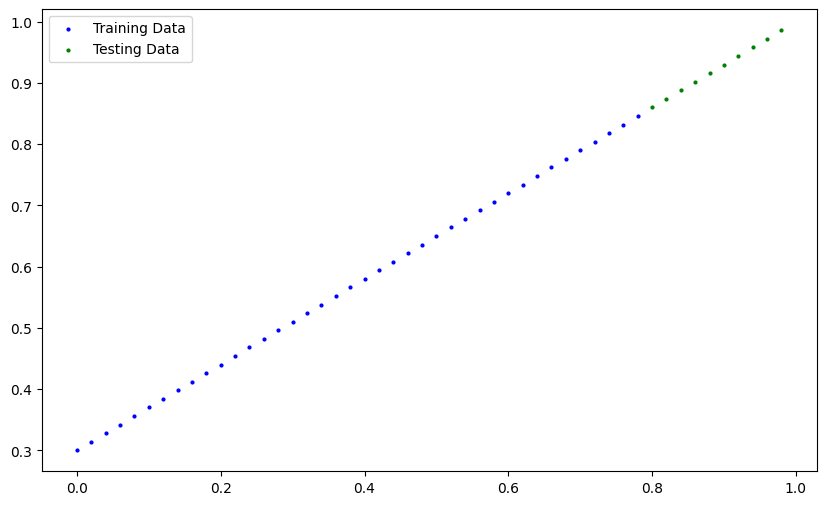

In [ ]:
def plot_predictions(train_data=x_train, train_labels=y_train,test_data=x_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,6))
  #Plot training Data
  plt.scatter(train_data,train_labels,c='blue',s=4, label='Training Data')
  #Plot test Data
  plt.scatter(test_data,test_labels,c='green',s=4,label='Testing Data')
  if predictions is not None:
    plt.scatter(test_data,predictions,c='red',s=4,label='Predicted data')
  plt.legend()
  plt.show()

plot_predictions()

First PyTorch Model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
  def forward(self,x:torch.Tensor):
      return self.weights*x+self.bias

In [ ]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())
with torch.inference_mode():
  y_preds = model_0 (x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

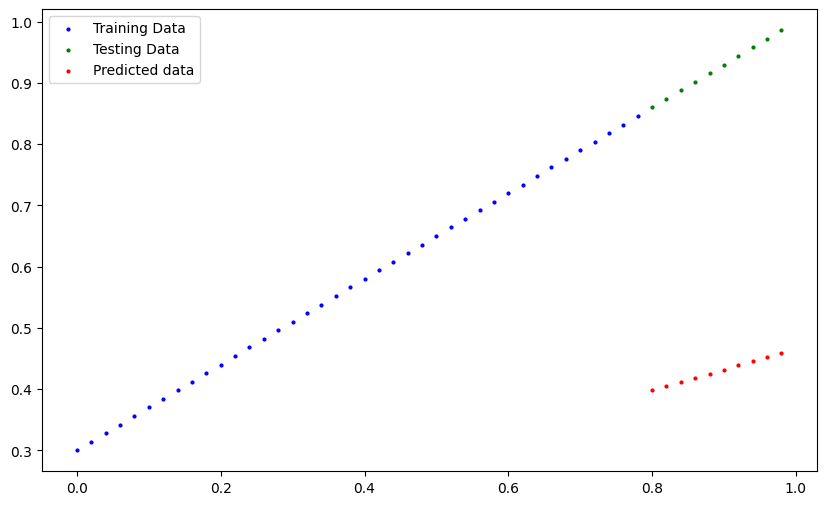

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
#Setting up a Loss Function
loss_fn=nn.L1Loss()
#Setting up an Optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [ ]:
#Setting up a training model
torch.manual_seed(42)
epochs=100
for epoch in range(epochs):
  model_0.train()
  #Forward pass
  y_pred=model_0(x_train)
  #loss
  loss=loss_fn(y_pred,y_train)
  print(f"Loss:{loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  print(model_0.state_dict())

Loss:0.017930403351783752
OrderedDict([('weights', tensor([0.6126])), ('bias', tensor([0.3368]))])
Loss:0.01758546568453312
OrderedDict([('weights', tensor([0.6141])), ('bias', tensor([0.3358]))])
Loss:0.017245199531316757
OrderedDict([('weights', tensor([0.6159])), ('bias', tensor([0.3353]))])
Loss:0.016896454617381096
OrderedDict([('weights', tensor([0.6175])), ('bias', tensor([0.3343]))])
Loss:0.01656000316143036
OrderedDict([('weights', tensor([0.6193])), ('bias', tensor([0.3338]))])
Loss:0.016210997477173805
OrderedDict([('weights', tensor([0.6211])), ('bias', tensor([0.3333]))])
Loss:0.01587124727666378
OrderedDict([('weights', tensor([0.6227])), ('bias', tensor([0.3323]))])
Loss:0.015525798313319683
OrderedDict([('weights', tensor([0.6245])), ('bias', tensor([0.3318]))])
Loss:0.015182236209511757
OrderedDict([('weights', tensor([0.6261])), ('bias', tensor([0.3308]))])
Loss:0.014840595424175262
OrderedDict([('weights', tensor([0.6279])), ('bias', tensor([0.3303]))])
Loss:0.014493

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(x_test)

y_preds_new

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

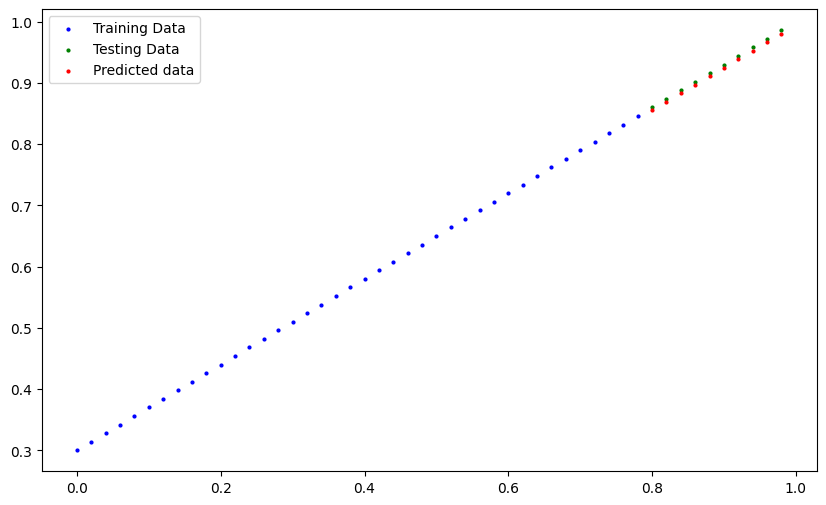

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="01_pytorch_workflow_LG_Model.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

In [ ]:
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1686 Sep  6 06:52 01_pytorch_workflow_LG_Model.pth


In [ ]:
loaded_model_0=LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

<ipython-input-112-1d76d44e3718>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])